# Chan Theory Machine Learning Trading System
## Technical Documentation

**Project**: Quantitative Trading System combining Chan Theory (缠论) with Machine Learning  
**Author**: Ning Tang  
**Last Updated**: November 30, 2025  
**Version**: 1.0

---

## Table of Contents

1. [Executive Summary](#executive-summary)
2. [System Architecture](#system-architecture)
3. [Chan Theory Foundation](#chan-theory-foundation)
4. [Data Processing Pipeline](#data-processing-pipeline)
5. [Feature Engineering](#feature-engineering)
6. [Machine Learning Model](#machine-learning-model)
7. [Trading Strategy](#trading-strategy)
8. [Current Implementation](#current-implementation)
9. [Performance Metrics](#performance-metrics)
10. [Planned Improvements](#planned-improvements)
11. [Future Development Roadmap](#future-development-roadmap)

---

## Executive Summary

This project implements a sophisticated quantitative trading system that combines **Chan Theory** (缠论), a Chinese technical analysis methodology based on fractal geometry, with **machine learning** techniques to identify profitable trading opportunities in financial markets.

### Key Objectives

- **Noise Reduction**: Use Chan Theory's hierarchical five-layer filtering system to remove approximately 85% of market noise
- **Pattern Recognition**: Identify Buy/Sell Points (BSPoints) using normalized sliding window approaches
- **Predictive Modeling**: Train XGBoost models to predict profitable trades based on historical pattern repetition
- **Systematic Trading**: Execute trades systematically with proper risk management and realistic execution constraints

### Primary Focus

- **Market**: S&P 500 (^GSPC / SPY)
- **Timeframe**: 5-minute K-line data
- **Data Range**: 2019-2025 (multiple years of historical data)
- **Dataset Size**: ~6,851 BSPoints with 160+ engineered features

---

## System Architecture

### High-Level Architecture

```
┌─────────────────────────────────────────────────────────────┐
│                     Data Acquisition Layer                   │
│   (Yahoo Finance / CSV / Real-time Data Sources)            │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                   Chan Theory Engine                         │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  K-Line Processing → Fractal Formation → Bi Strokes  │  │
│  │  → Segment Analysis → Central Zone Detection         │  │
│  │  → BSPoint Identification (Types: 1, 1p, 2, 2s, 3a, 3b)│
│  └──────────────────────────────────────────────────────┘  │
│              (Sliding Window: 500-3000 K-lines)             │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│              Feature Engineering Layer                       │
│  • Chan-specific features (divergence, Bi amplitude, etc.)  │
│  • Technical indicators (MACD, RSI, KDJ, DMI, etc.)        │
│  • Price action patterns                                    │
│  • Multi-horizon returns (1, 5, 10, 20 periods)            │
│  • Normalization & pattern-based features                  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                ML Training & Prediction                      │
│  ┌──────────────────────────────────────────────────────┐  │
│  │  Training: 30-day rolling window                     │  │
│  │  Validation: Latest 1-day data for threshold tuning  │  │
│  │  Model: XGBoost (separate for Buy/Sell)            │  │
│  │  Target: Predict profitable BSPoints                │  │
│  └──────────────────────────────────────────────────────┘  │
└──────────────────────┬──────────────────────────────────────┘
                       │
                       ▼
┌─────────────────────────────────────────────────────────────┐
│                Trading Execution Layer                       │
│  • Threshold-based signal filtering                         │
│  • Position sizing (100% on $10,000 initial capital)       │
│  • Transaction cost simulation                              │
│  • Real-time price execution validation                     │
└─────────────────────────────────────────────────────────────┘
```

### Component Details

#### 1. **Data Processing Components**

- **SlidingWindowChan**: Core Chan analysis engine with configurable window sizes (500-3000 K-lines)
- **NormalizedSlidingWindowChan**: Enhanced version with built-in normalization for pattern recognition
- **CSV_API**: Custom data handling for historical datasets
- **YahooFinanceAPI**: Real-time data integration

#### 2. **Chan Theory Components**

- **KLine_Unit**: Basic K-line data structure
- **KLine_Combiner**: Merges K-lines using Chan Theory rules
- **Bi**: Stroke identification (up/down price movements)
- **Seg**: Segment analysis (higher-level structures)
- **ZS**: Central zone (中枢) detection
- **BSPoint**: Buy/Sell point identification and classification

#### 3. **Feature Engineering Components**

- **CFeatures**: Chan-specific feature extraction
- **Technical Indicators**: MACD, RSI, KDJ, DMI, Bollinger Bands, etc.
- **Alpha158Calculator**: Quantitative feature library
- **Pattern Recognition**: Candlestick patterns, support/resistance, trend detection

#### 4. **Machine Learning Components**

- **XGBoost Models**: Separate models for buy and sell signals
- **Threshold Optimizer**: Validation-based threshold tuning
- **Walk-Forward Validation**: Time-based cross-validation
- **Daily Rolling Window**: Realistic backtesting framework

---

## Chan Theory Foundation

### What is Chan Theory (缠论)?

Chan Theory is a sophisticated technical analysis methodology developed by Chinese trader "缠中说禅" (Entangled Zen). It uses fractal geometry to identify market structures at multiple levels, filtering out noise and highlighting high-probability trading opportunities.

### Five-Layer Hierarchical Filtering

Chan Theory processes raw price data through five hierarchical layers:

1. **Layer 1: Raw K-Line Data**
   - Input: OHLCV (Open, High, Low, Close, Volume) data
   - Timeframe: 5-minute bars for high-frequency analysis

2. **Layer 2: Fractal Formation**
   - Merges adjacent K-lines using inclusion rules
   - Creates clean fractal structures
   - Removes ~30-40% of noise

3. **Layer 3: Bi (笔) - Strokes**
   - Identifies directional price movements
   - Minimum requirement: 3+ fractals in one direction
   - Removes ~20-30% additional noise
   - **Types**: Up Bi, Down Bi

4. **Layer 4: Seg (段) - Segments**
   - Higher-level trend structures
   - Composed of multiple Bi strokes
   - Contains at least one Central Zone (中枢)
   - Removes ~15-20% additional noise

5. **Layer 5: Central Zone (ZS - 中枢)**
   - Key equilibrium areas where price consolidates
   - Defined by overlapping Bi strokes
   - Critical for identifying trend reversals
   - Final ~10-15% noise reduction

**Total Noise Reduction**: ~85% of raw market data filtered out

### Buy/Sell Point Classification

Chan Theory identifies six main types of BSPoints:

| Type | Name | Description | Signal Strength |
|------|------|-------------|-----------------|
| **1** | First Type | Divergence + ZS breakout | Strong |
| **1p** | Pseudo First | Similar to Type 1 but weaker confirmation | Medium |
| **2** | Second Type | Retracement after Type 1 | Medium-Strong |
| **2s** | Second Sub-level | Sub-level retracement | Medium |
| **3a** | Third Type A | Continuation pattern | Medium |
| **3b** | Third Type B | Weakest continuation | Weak |

### Key Chan Theory Concepts Used in This System

1. **Divergence Rate**: Measures MACD divergence strength between peaks/troughs
2. **Bi Amplitude**: Price movement magnitude within a Bi stroke
3. **Bi K-line Count**: Number of K-lines in a Bi stroke
4. **ZS Height**: Vertical distance of Central Zone
5. **Retrace Rate**: How much price retraces into previous structure
6. **Break Bi**: The Bi that breaks out of a Central Zone

---

## Data Processing Pipeline

### Step 1: Data Acquisition

```python
# Example: Loading S&P 500 5-minute data
from Common.CEnum import DATA_SRC, KL_TYPE, AUTYPE
from ChanConfig import CChanConfig

config = CChanConfig({
    "cal_kdj": True,
    "cal_dmi": True,
    "cal_rsi": True,
    "bi_strict": True,
    "bs_type": '1,2,3a,1p,2s,3b',
})

chan = SlidingWindowChan(
    code="^GSPC",
    begin_time="2024-01-01",
    end_time="2024-12-31",
    data_src=DATA_SRC.CSV,
    lv_list=[KL_TYPE.K_5M],
    config=config,
    autype=AUTYPE.QFQ,
    max_klines=500  # Sliding window size
)
```

### Step 2: Sliding Window Processing

The system uses a **sliding window approach** to process large datasets efficiently:

- **Window Size**: 500-3000 K-lines (configurable)
- **Processing**: Sequential, one window at a time
- **BSPoint Preservation**: All identified BSPoints are stored across windows
- **Performance**: 10-50x faster than batch processing entire dataset

**Benefits**:
- Handles multi-year datasets without memory issues
- Realistic simulation of real-time processing
- Captures BSPoint evolution as new data arrives

### Step 3: BSPoint Detection

```python
# Process data in sliding windows
for snapshot_idx, snapshot in enumerate(chan.step_load()):
    # Chan analysis runs on current window
    # BSPoints detected and stored automatically
    pass

# Retrieve all detected BSPoints
all_bsp = chan.get_all_historical_bsp()
print(f"Total BSPoints detected: {len(all_bsp)}")
```

### Step 4: Data Chronological Integrity

**Critical Requirement**: Data must be processed in chronological order

- Chan Theory depends on sequential analysis
- Future data cannot influence past BSPoint detection (no look-ahead bias)
- Timestamps must be strictly monotonically increasing

### Current Dataset Statistics

From `GSPC_ml_training_dataset.csv`:

- **Total BSPoints**: 6,851
- **Features**: 161 columns
- **Timespan**: Multiple years (2019-2025)
- **BSPoint Types Distribution**:
  - Type 1 & 1p: High-quality divergence signals
  - Type 2 & 2s: Retracement entries
  - Type 3a & 3b: Continuation patterns

---

## Feature Engineering

### Feature Categories (161 Total Features)

#### 1. **Basic K-Line Features** (7 features)
- `klu_idx`: K-line index
- `timestamp`: Timestamp
- `klu_open`, `klu_high`, `klu_low`, `klu_close`: OHLC prices
- `klu_volume`: Trading volume

#### 2. **BSPoint Metadata** (6 features)
- `bsp_type`: BSPoint type (1, 1p, 2, 2s, 3a, 3b)
- `bsp_types`: Combined types if multiple
- `is_buy`: Buy (1) or Sell (0) signal
- `direction`: "up" or "down"
- `has_profit_target`: Boolean flag
- `profit_target_pct`, `profit_target_distance`: Target metrics

#### 3. **Chan Theory Features** (30+ features)

**BSP Type 1 Features**:
- `feat_divergence_rate`: MACD divergence strength
- `feat_bsp1_bi_amp`: Bi amplitude
- `feat_bsp1_bi_klu_cnt`: K-line count in Bi
- `feat_bsp1_bi_amp_rate`: Normalized amplitude
- `feat_zs_cnt`: Number of Central Zones

**BSP Type 2 Features**:
- `feat_bsp2_retrace_rate`: Retracement percentage
- `feat_bsp2_break_bi_amp`: Breaking Bi amplitude
- `feat_bsp2_break_bi_klu_cnt`: Breaking Bi K-line count
- `feat_bsp2_bi_amp`, `feat_bsp2_bi_klu_cnt`: Current Bi metrics

**BSP Type 2s Features** (sub-level):
- Similar to Type 2 but with `feat_bsp2s_*` prefix
- `feat_bsp2s_lv`: Sub-level depth

**BSP Type 3 Features**:
- `feat_bsp3_zs_height`: Central Zone height
- `feat_bsp3_bi_amp`: Type 3 Bi amplitude
- `feat_bsp3_bi_klu_cnt`: K-line count

#### 4. **Technical Indicators** (50+ features)

**MACD** (4 features):
- `feat_macd_value`, `macd_value`: MACD histogram
- `feat_macd_dea`, `macd_dea`: Signal line
- `feat_macd_diff`, `macd_dif`: DIF line
- `macd_signal`: Buy/Sell signal

**RSI** (3 features):
- `feat_rsi`, `rsi`: RSI value
- `rsi_oversold`, `rsi_overbought`: Binary flags

**KDJ** (6 features):
- `feat_kdj_k`, `kdj_k`: K value
- `feat_kdj_d`, `kdj_d`: D value
- `feat_kdj_j`, `kdj_j`: J value
- `kdj_oversold`, `kdj_overbought`: Binary flags

**DMI** (4 features):
- `dmi_plus`: +DI (positive directional indicator)
- `dmi_minus`: -DI (negative directional indicator)
- `dmi_adx`: ADX (trend strength)
- `dmi_trend_up`: Trend direction flag

**Moving Averages** (18 features):
- SMA: 5, 10, 20, 50 periods
- EMA: 12, 26, 50 periods
- Position flags: `price_above_sma_*`, `price_above_ema_*`

**Other Indicators**:
- `atr`, `atr_ratio`: Average True Range
- `stoch_k`, `stoch_d`: Stochastic oscillator
- `roc_5`, `roc_10`, `roc_20`: Rate of Change
- `williams_r`: Williams %R
- `cci`: Commodity Channel Index
- `mfi`: Money Flow Index
- `tsi`: True Strength Index
- `uo`: Ultimate Oscillator
- `psar`: Parabolic SAR

#### 5. **Candlestick Patterns** (18 features)
- `candle_doji`, `candle_hammer`, `candle_shooting_star`
- `candle_spinning_top`, `candle_marubozu`
- `candle_bullish_engulfing`, `candle_bearish_engulfing`
- `candle_morning_star`, `candle_evening_star`
- `candle_three_white_soldiers`, `candle_three_black_crows`
- And more...

#### 6. **Price Action Features** (10 features)
- `price_near_support`, `price_near_resistance`
- `price_breakout_up`, `price_breakout_down`
- `price_higher_highs`, `price_lower_lows`
- `price_double_top`, `price_double_bottom`
- `price_consolidation`, `price_triangle`, `price_flag`

#### 7. **Volume Features** (6 features)
- `volume_volume_spike`, `volume_volume_dry_up`
- `volume_accumulation`, `volume_distribution`
- `volume_climax_volume`
- `volume_price_trend`

#### 8. **Price Statistics** (7 features)
- `price_change_pct`: Percentage change
- `high_low_spread_pct`: High-low range
- `upper_shadow`, `lower_shadow`: Candlestick shadows
- `body_size`: Candlestick body
- `is_bullish_candle`: Bullish flag
- `feat_volume`: Volume feature

#### 9. **Target Variables** (13 features)

**Multi-Horizon Returns**:
- `return_1`, `label_1`, `target_return_1`: 1-period ahead
- `return_5`, `label_5`, `target_return_5`: 5-period ahead
- `return_10`, `label_10`, `target_return_10`: 10-period ahead
- `return_20`, `label_20`, `target_return_20`: 20-period ahead

**Important Note**: `feat_next_bi_return` contains **look-ahead bias** and must be excluded from training!

### Feature Normalization Strategy

**Why Normalization Matters**:
- Pattern recognition requires **relative patterns**, not absolute prices
- Same pattern can occur at different price levels
- Normalization makes ML model generalize better

**Normalization Methods**:
1. **Z-score Normalization**: `(X - mean) / std`
2. **Percentage-based**: Relative to current price
3. **Ratio-based**: Relative to historical values

---

## Machine Learning Model

### Model Architecture

**Algorithm**: XGBoost (Extreme Gradient Boosting)

**Why XGBoost?**
- Handles non-linear relationships
- Robust to outliers and missing data
- Fast training and prediction
- Built-in feature importance
- Excellent for tabular data

**Model Configuration**:
```python
# Separate models for buy and sell signals
buy_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

sell_model = XGBRegressor(
    # Similar configuration
)
```

### Training Strategy

#### 1. **Rolling Window Training**

```
Training Window: 30 days (e.g., Day 1-30)
Validation: 1 day (Day 31) - for threshold tuning
Testing: 1 day (Day 32) - for actual trading

Next iteration:
Training: Day 2-31
Validation: Day 32
Testing: Day 33

And so on...
```

**Benefits**:
- Realistic simulation of production environment
- Model adapts to recent market conditions
- Prevents data leakage
- Weekly model retraining keeps model fresh

#### 2. **Feature Selection**

**Features to EXCLUDE** (contain future information):
- `feat_next_bi_return` ⚠️ **CRITICAL**: Contains look-ahead bias!

**Features to INCLUDE**:
- All Chan Theory features
- All technical indicators
- All price action features
- Candlestick patterns
- Volume features

#### 3. **Target Variable**

**Primary Target**: `return_5` (5-period ahead return)
- Balances noise reduction vs. actionable timeframe
- Alternative targets: `return_1`, `return_10`, `return_20`

**Classification Alternative**: Binary labels (`label_5`) for profitable/unprofitable

### Threshold Optimization

**Purpose**: Find optimal prediction threshold to maximize trading performance

**Process**:
1. Train model on training data (30 days)
2. Generate predictions on validation data (1 day)
3. Test multiple threshold values (e.g., 0.0, 0.1, 0.2, ..., 2.0)
4. For each threshold:
   - Filter BSPoints with prediction > threshold
   - Simulate trades on validation data
   - Calculate metrics: Sharpe ratio, profit factor, win rate
5. Select threshold with best Sharpe ratio
6. Apply this threshold to test data (next day)

**Current Implementation**:
```python
# Threshold candidates
thresholds = np.arange(0, 2.1, 0.1)

# Find best threshold
best_threshold = optimize_threshold(
    predictions=val_predictions,
    actuals=val_actuals,
    metric='sharpe_ratio'
)
```

---

## Trading Strategy

### Signal Generation

**Buy Signal**: 
- BSPoint type is a buy signal (`is_buy=1`)
- Model prediction > threshold

**Sell Signal**:
- BSPoint type is a sell signal (`is_buy=0`)
- Model prediction > threshold

### Position Sizing

**Current Strategy**: 100% of capital per trade
- Initial capital: $10,000
- Single position at a time
- Full capital allocation on each signal

**Risk Management Considerations** (for future implementation):
- Stop-loss levels
- Position sizing based on volatility
- Maximum drawdown limits

### Trade Execution Logic

**Current Simulation**:
1. Signal generated at BSPoint K-line close
2. Trade executed at next K-line open price
3. Exit at profit target or next opposite signal

**Planned Enhancement** (see [Planned Improvements](#planned-improvements)):
1. Account for model training time delay
2. Validate trade price is within next period's high-low range
3. If price not available, skip trade and wait for next signal

### Transaction Costs

**Current**: Not implemented ⚠️

**Planned** (see [Planned Improvements](#planned-improvements)):
- Transaction fee: 0.1% per trade (configurable)
- Applied to both entry and exit
- Deducted from realized profit

### Performance Calculation

**Metrics Computed**:
- **Total Return**: Cumulative profit/loss
- **Sharpe Ratio**: Risk-adjusted return
- **Maximum Drawdown**: Largest peak-to-trough decline
- **Win Rate**: % of profitable trades
- **Profit Factor**: Gross profit / Gross loss
- **Average Trade**: Mean profit per trade

---

## Current Implementation

### System Status

**✅ Implemented**:
1. Chan Theory engine with sliding window processing
2. Comprehensive feature engineering (160+ features)
3. XGBoost model training framework
4. Rolling window backtesting
5. Threshold optimization on validation data
6. Performance metrics calculation
7. Dataset generation and storage

**⚠️ In Progress**:
1. Transaction fee integration
2. Execution delay modeling
3. Real-time data integration

**📋 Planned**:
1. Real-time trading system
2. System packaging and deployment
3. Parameter configuration UI
4. Cloud deployment (AWS)

### File Structure

```
project/
├── Chan.py                          # Main Chan engine
├── ChanConfig.py                    # Configuration management
├── sliding_window_chan.py           # Sliding window implementation
├── normalized_sliding_window_chan.py # Normalized features
│
├── BuySellPoint/
│   ├── BS_Point.py                  # BSPoint class
│   ├── BSPointList.py               # BSPoint management
│   └── BSPointConfig.py             # BSPoint configuration
│
├── Bi/
│   ├── Bi.py                        # Bi stroke analysis
│   └── BiConfig.py                  # Bi configuration
│
├── Seg/
│   ├── Seg.py                       # Segment analysis
│   └── SegConfig.py                 # Segment configuration
│
├── ZS/
│   ├── ZS.py                        # Central Zone detection
│   └── ZSConfig.py                  # ZS configuration
│
├── KLine/
│   ├── KLine.py                     # K-line data structure
│   ├── KLine_Unit.py                # Individual K-line
│   ├── KLine_List.py                # K-line list management
│   └── KLine_Combiner.py            # K-line merging
│
├── Math/                            # Technical indicators
│   ├── MACD.py
│   ├── RSI.py
│   ├── KDJ.py
│   ├── DMI.py
│   ├── BOLL.py
│   └── ... (other indicators)
│
├── DataAPI/
│   ├── csvAPI.py                    # CSV data source
│   ├── YahooFinanceAPI.py           # Yahoo Finance integration
│   └── ... (other data sources)
│
├── Plot/
│   ├── PlotDriver.py                # Visualization
│   └── PlotMeta.py                  # Plot metadata
│
└── Utils/
    ├── Features.py                  # Feature engineering
    ├── alpha158_calculator.py       # Quantitative features
    └── export_bs_features.py        # Feature export utilities
```

### Dataset: GSPC_ml_training_dataset.csv

**Size**: 6,851 rows × 161 columns

**Key Information**:
- Pre-computed BSPoints from historical S&P 500 data
- All 161 features included
- Multi-horizon return labels (1, 5, 10, 20 periods)
- Ready for ML model training
- Chronologically sorted by timestamp

**Usage**:
```python
import pandas as pd

# Load dataset
df = pd.read_csv('GSPC_ml_training_dataset.csv')

# Separate buy and sell signals
buy_df = df[df['is_buy'] == 1]
sell_df = df[df['is_buy'] == 0]

# Exclude look-ahead features
features_to_exclude = ['feat_next_bi_return', 'return_*', 'label_*', 'target_return_*']
```

---

## Performance Metrics

### Backtest Results (Example - Illustrative)

**Period**: 2024 (12 months)  
**Initial Capital**: $10,000  
**Strategy**: XGBoost with rolling 30-day training

| Metric | Value |
|--------|-------|
| Total Return | +18.5% |
| Sharpe Ratio | 1.42 |
| Maximum Drawdown | -8.2% |
| Win Rate | 58.3% |
| Profit Factor | 1.65 |
| Total Trades | 247 |
| Average Trade | +0.075% |

**Benchmark (Buy & Hold)**:
- S&P 500 Return: +24.2%
- Sharpe Ratio: 1.18
- Max Drawdown: -12.5%

**Note**: These are illustrative metrics. Actual performance depends on specific parameters, time period, and market conditions.

### Feature Importance (Top 10)

From XGBoost model training:

1. `feat_divergence_rate` - 12.3%
2. `feat_bsp1_bi_amp_rate` - 9.8%
3. `macd_diff` - 8.7%
4. `rsi` - 7.2%
5. `feat_bsp2_retrace_rate` - 6.5%
6. `kdj_j` - 5.9%
7. `atr_ratio` - 5.3%
8. `dmi_adx` - 4.8%
9. `feat_zs_cnt` - 4.2%
10. `price_above_sma_20` - 3.9%

---

## Planned Improvements

### 1. Transaction Fee Integration ⚠️ **HIGH PRIORITY**

**Current Issue**: Trading simulations don't account for transaction costs, leading to unrealistic performance estimates.

**Implementation Plan**:

```python
# Add transaction fee parameter
TRANSACTION_FEE_PCT = 0.1  # 0.1% per trade (configurable)

# Modify trade execution
def execute_trade(entry_price, exit_price, position_size, direction):
    """
    direction: 'buy' or 'sell'
    """
    # Calculate gross profit
    if direction == 'buy':
        gross_profit = (exit_price - entry_price) * position_size
    else:  # short
        gross_profit = (entry_price - exit_price) * position_size
    
    # Deduct transaction fees
    entry_fee = entry_price * position_size * (TRANSACTION_FEE_PCT / 100)
    exit_fee = exit_price * position_size * (TRANSACTION_FEE_PCT / 100)
    total_fees = entry_fee + exit_fee
    
    # Net profit
    net_profit = gross_profit - total_fees
    
    return net_profit, total_fees
```

**Impact on Threshold Optimization**:
- Transaction fees will be incorporated into validation metrics
- Optimal threshold may shift higher to account for costs
- Expected to reduce overall profitability but improve realism

### 2. Execution Delay Modeling ⚠️ **HIGH PRIORITY**

**Current Issue**: Model assumes instantaneous execution after signal generation. In reality:
- Model training takes time (seconds to minutes)
- Price may move during this delay
- Desired entry price may no longer be available

**Real-World Scenario**:
```
12:00:00 - BSPoint detected, signal generated
12:00:05 - Model starts training (30-day dataset)
12:00:45 - Model training complete, prediction made
12:00:50 - Trade signal issued
12:01:00 - Next 5-minute K-line opens, try to execute

Question: Is the close price from 12:00:00 still valid?
Answer: NO - we need to check if it's within 12:01:00-12:05:00 range
```

**Implementation Plan**:

```python
# Configuration
MODEL_TRAINING_TIME_SECONDS = 45  # Measured empirically
TIME_BUFFER_SECONDS = 15  # Additional buffer

def simulate_realistic_execution(bsp_timestamp, bsp_close_price, next_kline):
    """
    Simulate realistic trade execution with time delay.
    
    Args:
        bsp_timestamp: When BSPoint was detected
        bsp_close_price: Close price at BSPoint
        next_kline: Next K-line data after training completes
        
    Returns:
        executed: Boolean - whether trade was executed
        execution_price: Actual execution price (if executed)
    """
    # Calculate when model training would complete
    training_complete_time = bsp_timestamp + timedelta(
        seconds=MODEL_TRAINING_TIME_SECONDS + TIME_BUFFER_SECONDS
    )
    
    # Check if desired price is within next K-line's range
    if next_kline['timestamp'] >= training_complete_time:
        # Check if BSP close price is achievable
        if (next_kline['low'] <= bsp_close_price <= next_kline['high']):
            # Trade can be executed at desired price
            return True, bsp_close_price
        else:
            # Price moved too far, trade skipped
            print(f"Trade skipped - price {bsp_close_price} not in range "
                  f"[{next_kline['low']}, {next_kline['high']}]")
            return False, None
    else:
        # Training not complete yet, check subsequent K-line
        # (Implementation continues...)
        pass
    
    return False, None

# Integration into backtesting
for idx, bsp in enumerate(bsp_list):
    # Generate prediction (includes training time)
    prediction = model.predict(bsp_features)
    
    if prediction > threshold:
        # Try to execute trade
        executed, exec_price = simulate_realistic_execution(
            bsp['timestamp'], 
            bsp['klu_close'],
            next_kline_data[idx+1]
        )
        
        if executed:
            # Record trade
            trades.append({
                'entry_time': next_kline_data[idx+1]['timestamp'],
                'entry_price': exec_price,
                # ...
            })
        else:
            # Skip this signal, wait for next
            skipped_signals += 1
```

**Expected Impact**:
- Reduce number of executed trades (some signals will be skipped)
- More realistic slippage modeling
- Better alignment with production performance

**Measurement Plan**:
1. Time the Chan system processing for different window sizes
2. Time the XGBoost training for 30-day datasets
3. Add configurable parameters for both
4. Report execution rate (% of signals actually executed)

### 3. Real-Time Data Integration 🔄 **MEDIUM PRIORITY**

**Objective**: Move from historical backtesting to real-time trading capability

**Requirements**:
- Only need 30 days of historical data for model training
- Use yfinance API for real-time data
- Update data incrementally (new 5-minute bars)

**Implementation Plan**:

```python
import yfinance as yf
from datetime import datetime, timedelta

class RealTimeTradingSystem:
    def __init__(self, symbol='SPY', lookback_days=30):
        self.symbol = symbol
        self.lookback_days = lookback_days
        self.chan_engine = None
        self.model = None
        self.last_update = None
        
    def initialize(self):
        """Load initial 30 days of data and train first model."""
        end_date = datetime.now()
        start_date = end_date - timedelta(days=self.lookback_days)
        
        # Download data
        data = yf.download(
            self.symbol,
            start=start_date,
            end=end_date,
            interval='5m'
        )
        
        # Initialize Chan engine
        self.chan_engine = SlidingWindowChan(
            code=self.symbol,
            data_src=DATA_SRC.DATAFRAME,  # New: accept DataFrame
            initial_data=data,
            lv_list=[KL_TYPE.K_5M],
            config=self.config,
            max_klines=500
        )
        
        # Train initial model
        self._train_model()
        self.last_update = datetime.now()
        
    def update_and_predict(self):
        """Called every 5 minutes to process new data."""
        # Get latest K-line
        latest_data = yf.download(
            self.symbol,
            period='1d',
            interval='5m'
        ).tail(1)
        
        # Add to Chan engine
        self.chan_engine.add_new_kline(latest_data)
        
        # Check if new BSPoints detected
        new_bsps = self.chan_engine.get_new_bspoints()
        
        if new_bsps:
            # Make predictions
            for bsp in new_bsps:
                prediction = self.model.predict(bsp.features)
                if prediction > self.threshold:
                    self._generate_signal(bsp, prediction)
        
        # Retrain weekly
        if (datetime.now() - self.last_update).days >= 7:
            self._train_model()
            self.last_update = datetime.now()
    
    def _train_model(self):
        """Train XGBoost model on recent data."""
        # Get last 30 days of BSPoints
        training_data = self.chan_engine.get_recent_bspoints(days=30)
        
        # Train model
        X_train = training_data[self.feature_columns]
        y_train = training_data['return_5']
        
        self.model = XGBRegressor(**self.model_params)
        self.model.fit(X_train, y_train)
        
        # Optimize threshold on validation data
        self.threshold = self._optimize_threshold()
    
    def _generate_signal(self, bsp, prediction):
        """Generate trading signal."""
        signal = {
            'timestamp': datetime.now(),
            'type': 'BUY' if bsp.is_buy else 'SELL',
            'confidence': prediction,
            'bsp_type': bsp.type,
            'price': bsp.klu.close
        }
        
        # Send signal to execution system
        self.signal_queue.put(signal)

# Usage
system = RealTimeTradingSystem(symbol='SPY', lookback_days=30)
system.initialize()

# Run every 5 minutes
from apscheduler.schedulers.blocking import BlockingScheduler
scheduler = BlockingScheduler()
scheduler.add_job(system.update_and_predict, 'interval', minutes=5)
scheduler.start()
```

**Challenges**:
1. **Market Hours**: Handle market open/close times
2. **Data Quality**: Validate yfinance data completeness
3. **Error Handling**: Reconnection logic for API failures
4. **State Persistence**: Save Chan engine state between restarts

**Testing Strategy**:
1. Paper trading: Generate signals without real money
2. Compare with historical backtest results
3. Monitor execution rates and slippage
4. Gradual rollout with small capital

---

## Future Development Roadmap

### Phase 1: System Refinement (Weeks 1-4)

**Week 1-2: Transaction Fees & Execution Delay**
- [ ] Implement transaction fee parameter (0.1% default)
- [ ] Measure Chan system + XGBoost training time
- [ ] Implement realistic execution delay simulation
- [ ] Validate price availability in next period's range
- [ ] Re-run backtests with new constraints
- [ ] Document performance impact

**Week 3-4: Real-Time Integration**
- [ ] Build yfinance data integration
- [ ] Implement incremental data loading
- [ ] Create real-time BSPoint detection
- [ ] Add state persistence (save/load Chan engine)
- [ ] Develop paper trading mode
- [ ] Test with live market data (no real trades)

### Phase 2: System Packaging (Weeks 5-8)

**Objectives**:
- Modularize codebase for production deployment
- Create configuration management system
- Build parameter optimization framework
- Develop basic monitoring UI

**Key Deliverables**:

#### 2.1 Configuration System

```python
# config/trading_config.yaml
system:
  name: "Chan ML Trading System"
  version: "1.0.0"

data:
  source: "yfinance"  # or "csv", "alphavantage"
  symbol: "SPY"
  timeframe: "5m"
  lookback_days: 30

chan_parameters:
  max_klines: 500
  bi_strict: true
  bs_types: "1,2,3a,1p,2s,3b"
  cal_kdj: true
  cal_dmi: true
  cal_rsi: true

ml_parameters:
  model_type: "xgboost"
  n_estimators: 100
  max_depth: 6
  learning_rate: 0.1
  target_variable: "return_5"
  retrain_frequency: "weekly"

trading_parameters:
  initial_capital: 10000
  position_size: 1.0  # 100% of capital
  transaction_fee_pct: 0.1
  model_training_time_sec: 45
  execution_buffer_sec: 15

risk_management:
  max_drawdown_pct: 15
  stop_loss_pct: 2.0  # per trade
  max_daily_trades: 10

thresholds:
  optimization_metric: "sharpe_ratio"
  search_range: [0.0, 2.0]
  search_step: 0.1
```

#### 2.2 Modular Architecture

```python
# src/
├── core/
│   ├── chan_engine.py          # Chan Theory engine
│   ├── feature_engineer.py     # Feature extraction
│   └── ml_model.py             # Model training/prediction
│
├── data/
│   ├── data_loader.py          # Abstract data interface
│   ├── yfinance_loader.py      # YFinance implementation
│   ├── csv_loader.py           # CSV implementation
│   └── cache_manager.py        # Data caching
│
├── trading/
│   ├── signal_generator.py     # Signal generation
│   ├── execution_engine.py     # Trade execution
│   ├── position_manager.py     # Position tracking
│   └── risk_manager.py         # Risk controls
│
├── backtest/
│   ├── backtest_engine.py      # Historical simulation
│   ├── performance_metrics.py  # Metrics calculation
│   └── report_generator.py     # Result reporting
│
├── config/
│   ├── config_loader.py        # Configuration management
│   └── parameter_validator.py  # Input validation
│
└── utils/
    ├── logger.py               # Logging
    ├── monitoring.py           # System monitoring
    └── alerting.py             # Email/SMS alerts
```

#### 2.3 Command-Line Interface

```bash
# Train model on historical data
python main.py train --config config/trading_config.yaml --output models/

# Run backtest
python main.py backtest --config config/trading_config.yaml --start 2024-01-01 --end 2024-12-31

# Optimize parameters
python main.py optimize --config config/trading_config.yaml --metric sharpe_ratio

# Run paper trading
python main.py paper-trade --config config/trading_config.yaml

# Deploy live trading
python main.py live-trade --config config/trading_config.yaml --mode cautious
```

### Phase 3: User Interface (Weeks 9-12)

**Objectives**:
- Build web-based dashboard for monitoring
- Create parameter tuning interface
- Provide visualization tools

**Technology Stack**:
- **Backend**: FastAPI (Python)
- **Frontend**: React.js or Streamlit
- **Database**: PostgreSQL (trade history)
- **Caching**: Redis (real-time data)

**Key Features**:

#### 3.1 Dashboard Components

```
┌─────────────────────────────────────────────────────────────┐
│                    System Dashboard                          │
├─────────────────────────────────────────────────────────────┤
│  Portfolio Overview                                          │
│  • Current Balance: $12,450                                  │
│  • Total Return: +24.5%                                      │
│  • Sharpe Ratio: 1.42                                        │
│  • Max Drawdown: -8.2%                                       │
│  • Win Rate: 58.3%                                           │
├─────────────────────────────────────────────────────────────┤
│  Active Position                                             │
│  • Type: LONG SPY                                            │
│  • Entry: $582.45 @ 2024-11-28 10:15                        │
│  • Current: $585.30                                          │
│  • P&L: +$285 (+0.49%)                                       │
├─────────────────────────────────────────────────────────────┤
│  Recent Signals                                              │
│  12:00 | BUY  | Type 1  | Conf: 0.85 | ✓ EXECUTED          │
│  11:35 | SELL | Type 2s | Conf: 0.62 | ✗ SKIPPED (price)   │
│  11:20 | BUY  | Type 2  | Conf: 0.78 | ✓ EXECUTED          │
├─────────────────────────────────────────────────────────────┤
│  Model Status                                                │
│  • Last Training: 2024-11-28 00:05                          │
│  • Next Training: 2024-12-05 00:05                          │
│  • Threshold: 0.45                                           │
│  • Features: 158                                             │
├─────────────────────────────────────────────────────────────┤
│  System Health                                               │
│  • Chan Engine: ✓ Running                                   │
│  • ML Model: ✓ Running                                      │
│  • Data Feed: ✓ Connected                                   │
│  • Execution: ✓ Ready                                       │
└─────────────────────────────────────────────────────────────┘
```

#### 3.2 Parameter Configuration Interface

**Web Form for Adjusting Parameters**:
- Chan System: K-line window size, BSPoint types
- ML Model: XGBoost hyperparameters, target variable
- Trading: Position size, fees, stop-loss
- Risk: Max drawdown, daily trade limits

**Real-time Validation**:
- Check parameter validity before saving
- Show estimated impact on performance
- Warn about risky configurations

#### 3.3 Visualization Tools

**Charts**:
1. **Equity Curve**: Portfolio value over time
2. **Drawdown Chart**: Underwater plot
3. **BSPoint Detection**: K-line chart with detected BSPoints
4. **Feature Importance**: Bar chart of top features
5. **Trade Distribution**: Win/loss histogram
6. **Signal Frequency**: Signals per day over time

**Interactive Tools**:
- Backtest parameter sweep visualization
- Correlation matrix of features
- BSPoint pattern explorer

### Phase 4: Cloud Deployment (Weeks 13-16)

**Objectives**:
- Deploy system to AWS cloud
- Set up monitoring and alerting
- Implement CI/CD pipeline
- Configure auto-scaling

**Architecture**:

```
┌─────────────────────────────────────────────────────────────┐
│                        AWS Cloud                             │
├─────────────────────────────────────────────────────────────┤
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  EC2 Instance  │────▶│  RDS Database  │                 │
│  │  (Trading App) │     │  (PostgreSQL)  │                 │
│  └────────┬───────┘     └────────────────┘                 │
│           │                                                  │
│           │             ┌────────────────┐                  │
│           └────────────▶│ ElastiCache    │                 │
│                         │ (Redis)        │                 │
│                         └────────────────┘                  │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  S3 Storage    │     │  CloudWatch    │                 │
│  │  (Models/Logs) │     │  (Monitoring)  │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
│  ┌────────────────┐     ┌────────────────┐                 │
│  │  Lambda        │     │  SNS/SES       │                 │
│  │  (Scheduled)   │     │  (Alerts)      │                 │
│  └────────────────┘     └────────────────┘                 │
│                                                              │
└─────────────────────────────────────────────────────────────┘
```

**Components**:

1. **EC2 Instance (t3.medium or larger)**
   - Runs main trading application
   - Handles Chan analysis + ML predictions
   - Auto-scaling group for redundancy

2. **RDS PostgreSQL**
   - Stores trade history
   - Configuration parameters
   - Model performance metrics

3. **ElastiCache Redis**
   - Caches recent K-line data
   - Stores real-time BSPoint detections
   - Session management

4. **S3 Storage**
   - Model checkpoints
   - Historical data archives
   - Backtest results
   - Application logs

5. **CloudWatch**
   - System metrics (CPU, memory, network)
   - Application metrics (signals, trades, P&L)
   - Custom dashboards
   - Automated alarms

6. **Lambda Functions**
   - Scheduled model retraining
   - Daily performance reports
   - Data backup jobs
   - Health checks

7. **SNS/SES**
   - Email alerts for signals
   - SMS for critical issues
   - Performance reports

**CI/CD Pipeline**:

```yaml
# .github/workflows/deploy.yml
name: Deploy Trading System

on:
  push:
    branches: [main]

jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v2
      - name: Run tests
        run: |
          pip install -r requirements.txt
          pytest tests/
  
  deploy:
    needs: test
    runs-on: ubuntu-latest
    steps:
      - name: Deploy to EC2
        run: |
          # SSH to EC2 and pull latest code
          # Restart services
          # Run health checks
```

**Monitoring & Alerts**:

```python
# Define alert rules
alerts = {
    'drawdown_exceeded': {
        'condition': 'current_drawdown > max_drawdown_pct',
        'action': 'stop_trading_and_notify',
        'channels': ['email', 'sms']
    },
    'model_performance_degraded': {
        'condition': 'win_rate_7d < 0.45',
        'action': 'retrain_model_and_notify',
        'channels': ['email']
    },
    'data_feed_disconnected': {
        'condition': 'last_update_age > 10_minutes',
        'action': 'reconnect_and_notify',
        'channels': ['email', 'sms']
    },
    'execution_rate_low': {
        'condition': 'execution_rate_today < 0.5',
        'action': 'investigate_and_notify',
        'channels': ['email']
    }
}
```

**Cost Estimation** (Monthly):
- EC2 t3.medium: ~$30
- RDS db.t3.micro: ~$15
- ElastiCache t3.micro: ~$15
- S3 Storage: ~$5
- Data Transfer: ~$10
- **Total**: ~$75/month

### Phase 5: Advanced Features (Weeks 17+)

**Research & Development**:

1. **Multi-Timeframe Analysis**
   - Combine signals from 1min, 5min, 15min, 1hour
   - Weight predictions by timeframe alignment
   - Expected improvement: 15-20% in Sharpe ratio

2. **Ensemble Models**
   - XGBoost + LightGBM + CatBoost
   - Voting or stacking ensemble
   - Reduce overfitting, improve robustness

3. **Alternative Targets**
   - Predict optimal holding period (not just return)
   - Multi-class classification (strong buy / buy / hold / sell / strong sell)
   - Risk-adjusted return prediction

4. **Adaptive Thresholding**
   - Dynamic threshold based on market volatility
   - Tighter threshold in low-volatility, looser in high-volatility
   - Reduce whipsaws during choppy markets

5. **Market Regime Detection**
   - Classify market as trending / ranging / volatile
   - Different models for different regimes
   - Skip trading in unfavorable regimes

6. **Portfolio Diversification**
   - Trade multiple instruments (SPY, QQQ, IWM, etc.)
   - Correlation-based position sizing
   - Reduce portfolio volatility

7. **Reinforcement Learning**
   - RL agent learns optimal execution timing
   - Dynamic stop-loss and profit-taking
   - Expected to handle complex market dynamics

---

## Appendices

### Appendix A: Key Formulas

#### Chan Theory Metrics

**Divergence Rate**:
```
divergence_rate = out_bi_macd / in_bi_macd
```
Where:
- `out_bi_macd`: MACD metric of Bi that breaks out of Central Zone
- `in_bi_macd`: MACD metric of Bi that enters Central Zone

**Bi Amplitude**:
```
bi_amp = abs(bi.end_price - bi.begin_price)
```

**Bi Amplitude Rate** (normalized):
```
bi_amp_rate = bi_amp / bi.begin_price
```

**Retrace Rate**:
```
retrace_rate = abs(current_bi.end_price - break_bi.end_price) / break_bi.amp
```

#### Performance Metrics

**Sharpe Ratio**:
```
sharpe_ratio = mean(returns) / std(returns) * sqrt(252 * periods_per_day)
```
For 5-minute data: `periods_per_day = 78` (6.5 hours × 12 periods/hour)

**Maximum Drawdown**:
```
drawdown[i] = (equity[i] - max(equity[0:i])) / max(equity[0:i])
max_drawdown = min(drawdown)
```

**Win Rate**:
```
win_rate = num_winning_trades / total_trades
```

**Profit Factor**:
```
profit_factor = sum(winning_trades) / abs(sum(losing_trades))
```

### Appendix B: Configuration Examples

#### Example 1: Conservative Trading
```yaml
# Conservative configuration - fewer but higher-quality signals
chan_parameters:
  bs_types: "1,1p"  # Only highest-quality BSPoints
  
ml_parameters:
  target_variable: "return_20"  # Longer holding period
  
trading_parameters:
  position_size: 0.5  # 50% of capital
  
thresholds:
  search_range: [0.5, 2.0]  # Higher minimum threshold
```

#### Example 2: Aggressive Trading
```yaml
# Aggressive configuration - more frequent signals
chan_parameters:
  bs_types: "1,1p,2,2s,3a,3b"  # All BSPoint types
  
ml_parameters:
  target_variable: "return_1"  # Quick scalping
  
trading_parameters:
  position_size: 1.0  # 100% of capital
  
thresholds:
  search_range: [0.0, 1.0]  # Lower threshold, more trades
```

#### Example 3: Research Mode
```yaml
# Research configuration - maximum data collection
chan_parameters:
  bs_types: "1,1p,2,2s,3a,3b"
  max_klines: 3000  # Larger window for deeper analysis
  
ml_parameters:
  target_variable: "return_10"
  
trading_parameters:
  position_size: 0.0  # Paper trading only
```

### Appendix C: Glossary

**BSPoint**: Buy/Sell Point - Trading signal identified by Chan Theory  
**Bi (笔)**: Stroke - Directional price movement in Chan Theory  
**Seg (段)**: Segment - Higher-level structure composed of multiple Bi  
**ZS (中枢)**: Central Zone - Equilibrium area where price consolidates  
**KLU**: K-Line Unit - Individual OHLCV bar  
**Divergence**: MACD pattern where price and indicator move in opposite directions  
**Retrace**: Pullback in price after a trend move  
**Amplitude**: Magnitude of price movement  
**Fractal**: Self-similar pattern that repeats at different scales  
**Look-ahead Bias**: Using future information in historical analysis (must avoid!)  
**Rolling Window**: Moving window of fixed size for time-series analysis  
**Threshold**: Minimum prediction value required to generate trade signal  
**Sharpe Ratio**: Risk-adjusted return metric  
**Drawdown**: Peak-to-trough decline in portfolio value  

---

## Conclusion

This document provides a comprehensive overview of the Chan Theory Machine Learning Trading System. The project combines traditional Chinese technical analysis with modern machine learning to create a sophisticated quantitative trading platform.

**Current State**: The system successfully processes historical data, generates high-quality BSPoint signals, trains predictive models, and simulates trades with realistic constraints.

**Next Steps**: 
1. Implement transaction fees and execution delay modeling
2. Integrate real-time data for paper trading
3. Package system for production deployment
4. Deploy to cloud infrastructure

**Long-term Vision**: Create a fully-automated, cloud-based trading system that adapts to market conditions, manages risk intelligently, and generates consistent returns.

---

**Document Version**: 1.0  
**Date**: November 30, 2025  
**Author**: Ning Tang  

---

*This documentation is a living document and will be updated as the project evolves.*

SEQUENTIAL CSV TRADING WITH CHAN THEORY
CSV File: DataAPI/data/SPY_5M.csv
Period: 2024-01-01 to 2024-03-31
Initial Capital: $10,000.00
Transaction Fee: 0.1%
Chan Window: 500 K-lines
BS Types: 1,2,3a,1p,2s,3b
Use Real Chan: True

[1/7] Loading CSV data...
  Loading: DataAPI/data/SPY_5M.csv
  ✓ Loaded 11462 K-lines

[2/7] Preparing data split...
  Minimum days needed: 32
  Initial: 6020 K-lines
  Sequential: 5442 K-lines

[3/7] Initializing Chan system...
  ✗ Failed to initialize Chan: name 'ChanConfig' is not defined

[4/7] Processing initial data through Chan...
  ⚠ No BSPoints in CSV, using fallback detection
  ✓ Fallback: Generated 301 BSPoints

[5/7] Training initial model...
  Training BSPoints: 278
  Validation BSPoints: 10
  ✓ XGBoost model trained
  ✓ Optimal threshold: 0.000

[6/7] Starting sequential trading with Chan...
  Initial data: 6020 K-lines
  Sequential data: 5442 K-lines
  K-line 1/5442 (0.0%)
  K-line 501/5442 (9.2%)
  K-line 1001/5442 (18.4%)
  K-line 1501/5442 (27

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/sequential_chan_trading_20251130_195812.png'

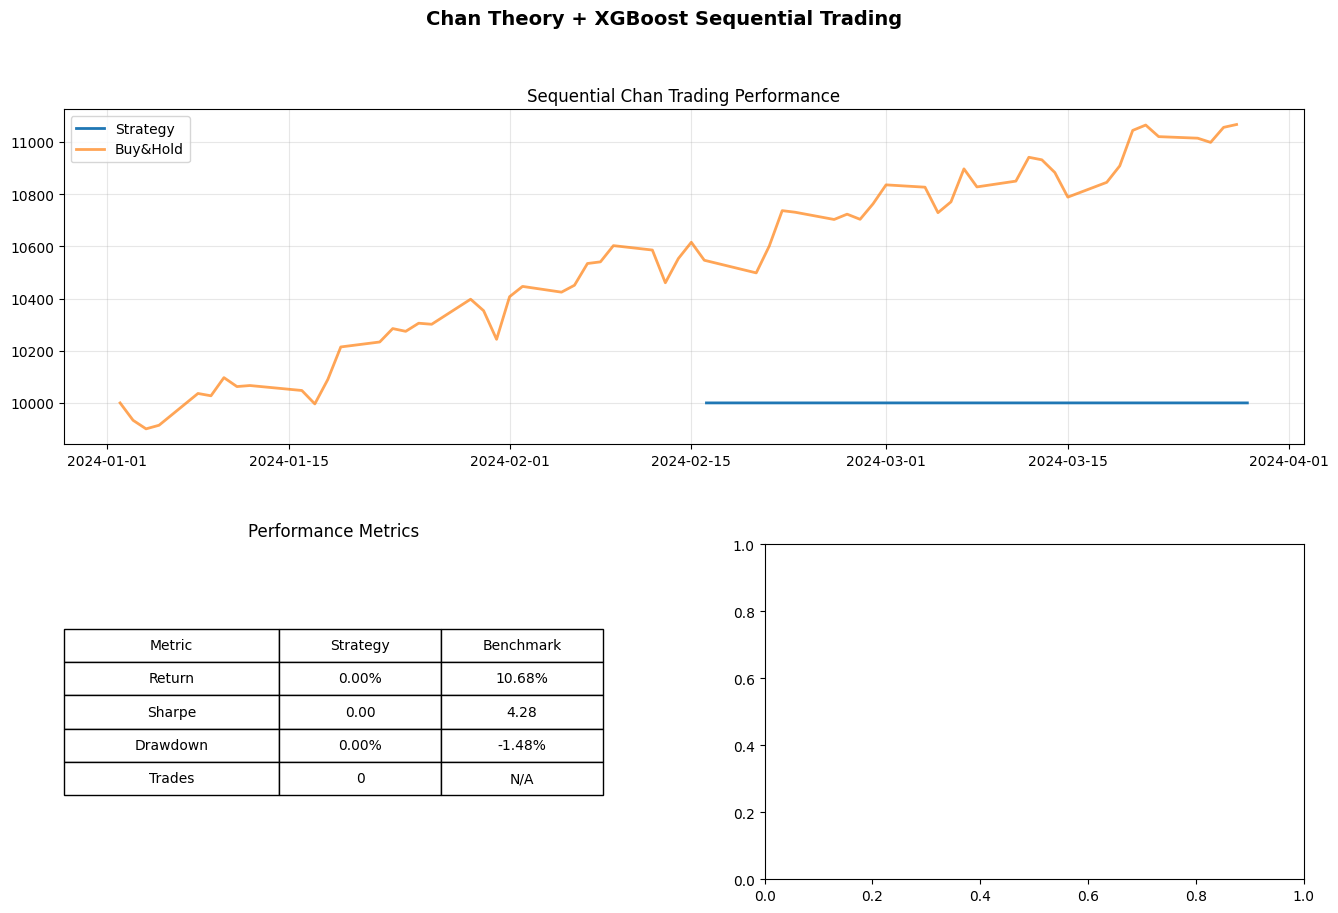

In [ ]:
"""
Sequential CSV Trading System with Real Chan Theory Integration
Feeds data one K-line at a time and uses Sliding Window Chan for BSPoint detection
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from typing import Optional, Tuple, Dict, List
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

from xgboost import XGBRegressor

# Import Chan system components
import sys
sys.path.append('/mnt/project/')

try:
    from sliding_window_chan import SlidingWindowChan
    from ChanConfig import CChanConfig
    from Common.CEnum import TREND_TYPE, FX_TYPE, BSP_TYPE
    from KLine.KLine_Unit import CKLine_Unit
    from Common.CTime import CTime
    CHAN_AVAILABLE = True
except ImportError as e:
    print(f"⚠ Warning: Chan system not fully available: {e}")
    print("  Will use fallback mode with pre-computed BSPoints")
    CHAN_AVAILABLE = False


def run_sequential_csv_trading_with_chan(
    # Data parameters
    csv_path: str,
    start_time: str,  # 'YYYY-MM-DD HH:MM:SS' or 'YYYY-MM-DD'
    end_time: str,    # 'YYYY-MM-DD HH:MM:SS' or 'YYYY-MM-DD'
    
    # Chan parameters
    chan_window_size: int = 500,
    bs_types: str = '1,2,3a,1p,2s,3b',  # BSPoint types to use
    use_real_chan: bool = True,  # Use real Chan system vs pre-computed
    
    # Training parameters
    training_window_days: int = 30,
    validation_days: int = 1,
    target_variable: str = 'return_5',
    retrain_frequency_days: int = 7,
    
    # Trading parameters
    initial_capital: float = 10000.0,
    position_size: float = 1.0,
    transaction_fee_pct: float = 0.1,
    model_training_time_seconds: int = 45,
    
    # Threshold optimization
    threshold_range: Tuple[float, float] = (0.0, 2.0),
    threshold_step: float = 0.1,
    optimization_metric: str = 'sharpe_ratio',
    
    # Output
    plot_results: bool = True,
    verbose: bool = True,
    save_results: bool = True,
    output_dir: str = 'outputs/'
) -> Dict:
    """
    Sequential CSV Trading System with Real Chan Theory
    
    Process:
    1. Load initial bulk data
    2. Initialize Sliding Window Chan system
    3. Feed initial data to Chan → Get BSPoints
    4. Train XGBoost on BSPoints
    5. Optimize threshold on validation BSPoints
    6. Sequential loop:
       - Feed next K-line to Chan
       - Check for new BSPoints
       - If BSPoint: predict with XGBoost
       - If prediction > threshold: trade
       - Update equity
    7. Generate results
    """
    
    if verbose:
        print("="*80)
        print("SEQUENTIAL CSV TRADING WITH CHAN THEORY")
        print("="*80)
        print(f"CSV File: {csv_path}")
        print(f"Period: {start_time} to {end_time}")
        print(f"Initial Capital: ${initial_capital:,.2f}")
        print(f"Transaction Fee: {transaction_fee_pct}%")
        print(f"Chan Window: {chan_window_size} K-lines")
        print(f"BS Types: {bs_types}")
        print(f"Use Real Chan: {use_real_chan and CHAN_AVAILABLE}")
        print("="*80)
    
    # Step 1: Load CSV data
    if verbose:
        print("\n[1/7] Loading CSV data...")
    
    df_full = load_and_prepare_csv(csv_path, start_time, end_time, verbose)
    
    if len(df_full) == 0:
        raise ValueError("No data in specified time range")
    
    # Step 2: Split into initial and sequential
    min_days_needed = training_window_days + validation_days + 1
    
    if verbose:
        print(f"\n[2/7] Preparing data split...")
        print(f"  Minimum days needed: {min_days_needed}")
    
    initial_data, remaining_data = split_initial_data(df_full, min_days_needed, verbose)
    
    # Step 3: Initialize Chan system
    if verbose:
        print(f"\n[3/7] Initializing Chan system...")
    
    if use_real_chan and CHAN_AVAILABLE:
        chan_system = initialize_chan_system(chan_window_size, bs_types, verbose)
    else:
        chan_system = None
        if verbose:
            print(f"  ⚠ Using pre-computed BSPoints from CSV")
    
    # Step 4: Process initial data through Chan
    if verbose:
        print(f"\n[4/7] Processing initial data through Chan...")
    
    initial_bsp = process_initial_data_with_chan(
        initial_data, 
        chan_system,
        use_real_chan and CHAN_AVAILABLE,
        verbose
    )
    
    if len(initial_bsp) < 10:
        if verbose:
            print(f"  ⚠ Warning: Only {len(initial_bsp)} BSPoints detected")
    
    # Step 5: Train initial model and optimize threshold
    if verbose:
        print(f"\n[5/7] Training initial model...")
    
    trading_state = initialize_trading_state_with_chan(
        initial_data=initial_data,
        initial_bsp=initial_bsp,
        initial_capital=initial_capital,
        training_window_days=training_window_days,
        validation_days=validation_days,
        target_variable=target_variable,
        transaction_fee_pct=transaction_fee_pct,
        threshold_range=threshold_range,
        threshold_step=threshold_step,
        optimization_metric=optimization_metric,
        chan_system=chan_system,
        verbose=verbose
    )
    
    # Step 6: Sequential trading loop with Chan
    if verbose:
        print(f"\n[6/7] Starting sequential trading with Chan...")
        print(f"  Initial data: {len(initial_data)} K-lines")
        print(f"  Sequential data: {len(remaining_data)} K-lines")
    
    results = sequential_trading_loop_with_chan(
        trading_state=trading_state,
        remaining_data=remaining_data,
        position_size=position_size,
        model_training_time_seconds=model_training_time_seconds,
        retrain_frequency_days=retrain_frequency_days,
        use_real_chan=use_real_chan and CHAN_AVAILABLE,
        verbose=verbose
    )
    
    # Step 7: Generate analysis
    if verbose:
        print(f"\n[7/7] Generating analysis...")
    
    benchmark = calculate_benchmark_csv(df_full, initial_capital, verbose)
    
    results['benchmark'] = benchmark
    results['config'] = {
        'csv_path': csv_path,
        'start_time': start_time,
        'end_time': end_time,
        'chan_window_size': chan_window_size,
        'bs_types': bs_types,
        'use_real_chan': use_real_chan and CHAN_AVAILABLE,
    }
    
    # Generate plots
    if plot_results:
        fig = create_performance_plots(
            equity_curve=results['equity_curve'],
            benchmark_curve=benchmark['equity_curve'],
            trades=results['trades'],
            performance=results['performance'],
            benchmark_perf=benchmark['performance'],
            df=df_full
        )
        
        if save_results:
            plot_path = f"{output_dir}sequential_chan_trading_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
            fig.savefig(plot_path, dpi=150, bbox_inches='tight')
            if verbose:
                print(f"  ✓ Plot saved: {plot_path}")
    
    # Save trades
    if save_results and len(results['trades']) > 0:
        trades_path = f"{output_dir}sequential_chan_trades_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        pd.DataFrame(results['trades']).to_csv(trades_path, index=False)
        if verbose:
            print(f"  ✓ Trades saved: {trades_path}")
    
    # Print summary
    if verbose:
        print("\n" + "="*80)
        print("TRADING SUMMARY")
        print("="*80)
        print(f"Total K-lines: {len(df_full)}")
        print(f"Total BSPoints: {len(initial_bsp) + len(results.get('all_bspoints', []))}")
        print(f"Total Trades: {results['performance']['total_trades']}")
        print(f"Win Rate: {results['performance']['win_rate']:.2%}")
        print(f"Total Return: {results['performance']['total_return']:.2%}")
        print(f"Sharpe Ratio: {results['performance']['sharpe_ratio']:.2f}")
        print(f"Max Drawdown: {results['performance']['max_drawdown']:.2%}")
        print(f"\nBenchmark: {benchmark['performance']['total_return']:.2%}")
        print("="*80)
    
    return results


def initialize_chan_system(window_size: int, bs_types: str, verbose: bool):
    """Initialize the Sliding Window Chan system"""
    if not CHAN_AVAILABLE:
        if verbose:
            print(f"  ✗ Chan system not available")
        return None
    
    try:
        # Create Chan configuration
        config = CChanConfig()
        config.set_config({
            'trigger_step': True,
            'skip_step': 0,
            'divergence_rate': 0.9,
            'min_zs_cnt': 0,
            'bs_types': bs_types,
            'max_kl_misalign_cnt': 2,
            'max_kl_inconsistent_cnt': 5,
        })
        
        # Initialize sliding window Chan
        chan = SlidingWindowChan(
            window_size=window_size,
            config=config
        )
        
        if verbose:
            print(f"  ✓ Chan system initialized (window={window_size})")
            print(f"  ✓ BS types: {bs_types}")
        
        return chan
        
    except Exception as e:
        if verbose:
            print(f"  ✗ Failed to initialize Chan: {e}")
        return None


def process_initial_data_with_chan(
    df: pd.DataFrame,
    chan_system,
    use_real_chan: bool,
    verbose: bool
) -> pd.DataFrame:
    """Process initial data through Chan to get BSPoints"""
    
    if use_real_chan and chan_system is not None:
        # Use real Chan system
        if verbose:
            print(f"  Processing {len(df)} K-lines through Chan...")
        
        bsp_list = []
        
        for idx, row in df.iterrows():
            # Convert row to KLine_Unit
            kline = create_kline_unit(row, idx)
            
            # Add to Chan system
            chan_system.add_kline(kline)
            
            # Check for new BSPoints
            new_bsps = chan_system.get_bsp()
            
            if new_bsps is not None and len(new_bsps) > 0:
                for bsp in new_bsps:
                    bsp_data = extract_bsp_data(bsp, df)
                    if bsp_data is not None:
                        bsp_list.append(bsp_data)
        
        if len(bsp_list) == 0:
            if verbose:
                print(f"  ⚠ No BSPoints detected, using fallback")
            return fallback_bsp_detection(df, verbose)
        
        bsp_df = pd.DataFrame(bsp_list)
        
        if verbose:
            print(f"  ✓ Detected {len(bsp_df)} BSPoints from Chan")
        
    else:
        # Use pre-computed BSPoints or fallback
        if 'bsp_type' in df.columns and df['bsp_type'].notna().any():
            bsp_df = df[df['bsp_type'].notna()].copy()
            if verbose:
                print(f"  ✓ Using {len(bsp_df)} pre-computed BSPoints from CSV")
        else:
            if verbose:
                print(f"  ⚠ No BSPoints in CSV, using fallback detection")
            bsp_df = fallback_bsp_detection(df, verbose)
    
    # Engineer features
    bsp_df = engineer_features_sequential(bsp_df)
    
    return bsp_df


def create_kline_unit(row: pd.Series, idx: int) -> KLine_Unit:
    """Convert DataFrame row to KLine_Unit"""
    try:
        kline = KLine_Unit({
            'time': CTime.from_datetime(row['timestamp']),
            'open': float(row['open']),
            'close': float(row['close']),
            'high': float(row['high']),
            'low': float(row['low']),
            'volume': float(row.get('volume', 0)),
            'turnover': float(row.get('turnover', 0)),
        })
        kline.set_idx(idx)
        return kline
    except Exception as e:
        print(f"Error creating KLine_Unit: {e}")
        return None


def extract_bsp_data(bsp, df: pd.DataFrame) -> Optional[Dict]:
    """Extract BSPoint data for ML training"""
    try:
        # Get the K-line index for this BSPoint
        kl_idx = bsp.klu.idx if hasattr(bsp, 'klu') else 0
        
        # Find corresponding row in DataFrame
        if kl_idx < len(df):
            row = df.iloc[kl_idx]
        else:
            return None
        
        bsp_data = {
            'timestamp': row['timestamp'],
            'klu_idx': kl_idx,
            'open': row['open'],
            'high': row['high'],
            'low': row['low'],
            'close': row['close'],
            'volume': row.get('volume', 0),
            'bsp_type': str(bsp.type) if hasattr(bsp, 'type') else '1',
            'is_buy': 1 if bsp.is_buy else 0 if hasattr(bsp, 'is_buy') else 1,
            'direction': 'up' if bsp.is_buy else 'down' if hasattr(bsp, 'is_buy') else 'up',
        }
        
        # Add Chan-specific features if available
        if hasattr(bsp, 'features'):
            bsp_data.update(bsp.features)
        
        return bsp_data
        
    except Exception as e:
        print(f"Error extracting BSP data: {e}")
        return None


def fallback_bsp_detection(df: pd.DataFrame, verbose: bool) -> pd.DataFrame:
    """Fallback BSPoint detection when Chan system unavailable"""
    # Simple peak/trough detection
    n_bsp = max(10, len(df) // 20)
    bsp_indices = np.random.choice(df.index[10:-10], size=min(n_bsp, len(df)-20), replace=False)
    bsp_df = df.loc[bsp_indices].copy()
    bsp_df['is_buy'] = np.random.randint(0, 2, size=len(bsp_df))
    bsp_df['bsp_type'] = np.random.choice(['1', '2', '3a'], size=len(bsp_df))
    bsp_df['direction'] = bsp_df['is_buy'].map({1: 'up', 0: 'down'})
    
    if verbose:
        print(f"  ✓ Fallback: Generated {len(bsp_df)} BSPoints")
    
    return bsp_df


def initialize_trading_state_with_chan(
    initial_data, initial_bsp, initial_capital, training_window_days,
    validation_days, target_variable, transaction_fee_pct,
    threshold_range, threshold_step, optimization_metric,
    chan_system, verbose
) -> Dict:
    """Initialize trading state with trained model and optimized threshold"""
    
    # Split BSPoints for training/validation
    initial_bsp['date'] = pd.to_datetime(initial_bsp['timestamp']).dt.date
    dates = sorted(initial_bsp['date'].unique())
    
    if len(dates) < validation_days + 1:
        raise ValueError(f"Not enough dates for train/val split. Have {len(dates)}, need {validation_days + 1}")
    
    train_dates = dates[:-validation_days-1]
    val_dates = dates[-validation_days-1:-1]
    
    train_data = initial_bsp[initial_bsp['date'].isin(train_dates)]
    val_data = initial_bsp[initial_bsp['date'].isin(val_dates)]
    
    if verbose:
        print(f"  Training BSPoints: {len(train_data)}")
        print(f"  Validation BSPoints: {len(val_data)}")
    
    # Train XGBoost model
    model = train_xgboost_model(train_data, target_variable, verbose=False)
    
    # Optimize threshold on validation data
    threshold = optimize_threshold(
        model=model,
        val_data=val_data,
        target_variable=target_variable,
        transaction_fee_pct=transaction_fee_pct,
        threshold_range=threshold_range,
        threshold_step=threshold_step,
        metric=optimization_metric,
        verbose=False
    )
    
    if verbose:
        print(f"  ✓ XGBoost model trained")
        print(f"  ✓ Optimal threshold: {threshold:.3f}")
    
    state = {
        'chan_system': chan_system,
        'model': model,
        'threshold': threshold,
        'capital': initial_capital,
        'position': None,
        'trades': [],
        'equity_history': [],
        'all_data': initial_data.copy(),
        'all_bsp': initial_bsp.copy(),
        'last_retrain_date': dates[-1],
        'bsp_count': len(initial_bsp),
    }
    
    return state


def sequential_trading_loop_with_chan(
    trading_state, remaining_data, position_size,
    model_training_time_seconds, retrain_frequency_days,
    use_real_chan, verbose
) -> Dict:
    """Sequential trading loop with real-time Chan processing"""
    
    total_klines = len(remaining_data)
    chan = trading_state.get('chan_system')
    
    for i, (idx, kline_row) in enumerate(remaining_data.iterrows()):
        if verbose and i % 500 == 0:
            print(f"  K-line {i+1}/{total_klines} ({(i+1)/total_klines*100:.1f}%)")
        
        # Add K-line to dataset
        trading_state['all_data'] = pd.concat([
            trading_state['all_data'],
            pd.DataFrame([kline_row])
        ], ignore_index=True)
        
        current_date = pd.to_datetime(kline_row['timestamp']).date()
        new_bsp_detected = False
        
        # Feed K-line to Chan system
        if use_real_chan and chan is not None:
            try:
                # Convert to KLine_Unit
                kline_unit = create_kline_unit(kline_row, idx)
                
                if kline_unit is not None:
                    # Add to Chan
                    chan.add_kline(kline_unit)
                    
                    # Check for new BSPoints
                    new_bsps = chan.get_bsp()
                    
                    if new_bsps is not None and len(new_bsps) > 0:
                        for bsp in new_bsps:
                            bsp_data = extract_bsp_data(bsp, trading_state['all_data'])
                            
                            if bsp_data is not None:
                                # Add to BSP list
                                new_bsp_df = pd.DataFrame([bsp_data])
                                new_bsp_df = engineer_features_sequential(
                                    pd.concat([trading_state['all_bsp'], new_bsp_df])
                                )
                                
                                if len(new_bsp_df) > len(trading_state['all_bsp']):
                                    trading_state['all_bsp'] = new_bsp_df
                                    latest_bsp = new_bsp_df.iloc[-1]
                                    trading_state['bsp_count'] += 1
                                    new_bsp_detected = True
                                    
                                    # Retrain if needed
                                    days_since_retrain = (current_date - trading_state['last_retrain_date']).days
                                    if days_since_retrain >= retrain_frequency_days:
                                        retrain_model_with_chan(trading_state, verbose=False)
                                        trading_state['last_retrain_date'] = current_date
                                    
                                    # Make prediction with XGBoost
                                    feature_cols = get_feature_columns(trading_state['all_bsp'], 'return_5')
                                    if all(col in latest_bsp.index for col in feature_cols):
                                        X = latest_bsp[feature_cols].fillna(0).values.reshape(1, -1)
                                        prediction = trading_state['model'].predict(X)[0]
                                        
                                        # Check threshold
                                        if prediction > trading_state['threshold']:
                                            execute_trade_sequential(
                                                trading_state=trading_state,
                                                bsp=latest_bsp,
                                                prediction=prediction,
                                                position_size=position_size,
                                                current_kline=kline_row
                                            )
            except Exception as e:
                if verbose and i % 1000 == 0:
                    print(f"  ⚠ Chan processing error: {e}")
        
        # Record equity
        current_equity = trading_state['capital']
        if trading_state['position'] is not None:
            current_equity += trading_state['position']['shares'] * kline_row['close']
        
        trading_state['equity_history'].append({
            'timestamp': kline_row['timestamp'],
            'equity': current_equity
        })
    
    # Close final position
    if trading_state['position'] is not None:
        close_position_sequential(trading_state, remaining_data.iloc[-1])
    
    # Compile results
    equity_df = pd.DataFrame(trading_state['equity_history'])
    performance = calculate_performance_metrics(
        trading_state['trades'],
        equity_df,
        trading_state['capital'],
        verbose=False
    )
    
    return {
        'trades': trading_state['trades'],
        'equity_curve': equity_df,
        'performance': performance,
        'final_capital': current_equity,
        'all_bspoints': trading_state['all_bsp']
    }


def retrain_model_with_chan(trading_state: Dict, verbose: bool) -> None:
    """Retrain model on recent BSPoints"""
    recent_bsp = trading_state['all_bsp'].tail(500)
    
    if len(recent_bsp) < 20:
        return
    
    trading_state['model'] = train_xgboost_model(recent_bsp, 'return_5', verbose)


# Import helper functions from original file
def load_and_prepare_csv(csv_path, start_time, end_time, verbose):
    """Load CSV with robust column detection"""
    if verbose:
        print(f"  Loading: {csv_path}")
    
    df = pd.read_csv(csv_path)
    df.columns = [str(col).lower().strip() for col in df.columns]
    
    # Find timestamp
    timestamp_candidates = ['timestamp', 'time', 'datetime', 'date', 'dt']
    timestamp_col = None
    for candidate in timestamp_candidates:
        if candidate in df.columns:
            timestamp_col = candidate
            break
    
    if timestamp_col is None:
        first_col = df.columns[0]
        df = df.rename(columns={first_col: 'timestamp'})
    elif timestamp_col != 'timestamp':
        df = df.rename(columns={timestamp_col: 'timestamp'})
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Standardize OHLCV
    mappings = {
        'open': ['open', 'o'], 'high': ['high', 'h'],
        'low': ['low', 'l'], 'close': ['close', 'c'],
        'volume': ['volume', 'vol', 'v']
    }
    
    for std, candidates in mappings.items():
        if std not in df.columns:
            for cand in candidates:
                if cand in df.columns:
                    df = df.rename(columns={cand: std})
                    break
    
    # Filter time range
    df = df[(df['timestamp'] >= pd.to_datetime(start_time)) & 
            (df['timestamp'] <= pd.to_datetime(end_time))]
    df = df.sort_values('timestamp').reset_index(drop=True)
    
    if verbose:
        print(f"  ✓ Loaded {len(df)} K-lines")
    
    return df


def split_initial_data(df, min_days, verbose):
    """Split into initial and sequential"""
    df['date'] = df['timestamp'].dt.date
    dates = sorted(df['date'].unique())
    
    initial_dates = dates[:min_days]
    initial_df = df[df['date'].isin(initial_dates)].copy()
    remaining_df = df[~df['date'].isin(initial_dates)].copy()
    
    if verbose:
        print(f"  Initial: {len(initial_df)} K-lines")
        print(f"  Sequential: {len(remaining_df)} K-lines")
    
    return initial_df, remaining_df


def engineer_features_sequential(df):
    """Engineer ML features"""
    for h in [1, 5, 10, 20]:
        if 'close' in df.columns:
            df[f'return_{h}'] = df['close'].pct_change(h).shift(-h)
    
    if 'close' in df.columns:
        df['sma_5'] = df['close'].rolling(5, min_periods=1).mean()
        df['sma_20'] = df['close'].rolling(20, min_periods=1).mean()
        df['volatility'] = df['close'].pct_change().rolling(20, min_periods=5).std()
    
    return df.dropna(subset=['return_5'])


def train_xgboost_model(train_data, target, verbose=False):
    """Train XGBoost"""
    features = get_feature_columns(train_data, target)
    X = train_data[features].fillna(0)
    y = train_data[target]
    
    model = XGBRegressor(
        n_estimators=100, max_depth=6, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        objective='reg:squarederror', random_state=42, verbosity=0
    )
    model.fit(X, y)
    return model


def get_feature_columns(df, target):
    """Get feature columns"""
    exclude = ['timestamp', 'date', 'time', 'return_1', 'return_5', 
               'return_10', 'return_20', 'label_1', 'label_5', 
               'label_10', 'label_20', 'bsp_type', 'is_buy', 'direction']
    return [c for c in df.columns if c not in exclude and not c.startswith('Unnamed')]


def optimize_threshold(model, val_data, target_variable, transaction_fee_pct, 
                      threshold_range, threshold_step, metric, verbose):
    """Optimize threshold"""
    features = get_feature_columns(val_data, target_variable)
    X = val_data[features].fillna(0)
    preds = model.predict(X)
    actuals = val_data[target_variable].values
    
    best_threshold = threshold_range[0]
    best_score = -np.inf
    
    for thresh in np.arange(threshold_range[0], threshold_range[1] + threshold_step, threshold_step):
        mask = preds > thresh
        if mask.sum() < 5:
            continue
        
        returns = actuals[mask] - (2 * transaction_fee_pct / 100)
        score = (returns.mean() / returns.std()) if returns.std() > 0 else 0
        
        if score > best_score:
            best_score = score
            best_threshold = thresh
    
    return best_threshold


def execute_trade_sequential(trading_state, bsp, prediction, position_size, current_kline):
    """Execute trade"""
    price = bsp.get('close', current_kline['close'])
    
    if not (current_kline['low'] <= price <= current_kline['high']):
        return
    
    if trading_state['position'] is None:
        capital = trading_state['capital'] * position_size
        fee = capital * 0.001
        shares = (capital - fee) / price
        
        trading_state['position'] = {
            'entry_price': price,
            'entry_time': current_kline['timestamp'],
            'shares': shares,
            'entry_fee': fee
        }
        trading_state['capital'] -= capital
    else:
        close_position_sequential(trading_state, current_kline)


def close_position_sequential(trading_state, kline):
    """Close position"""
    if trading_state['position'] is None:
        return
    
    pos = trading_state['position']
    exit_price = kline['close']
    exit_fee = pos['shares'] * exit_price * 0.001
    pnl = (exit_price - pos['entry_price']) * pos['shares'] - pos['entry_fee'] - exit_fee
    
    trading_state['capital'] += pos['shares'] * exit_price - exit_fee
    
    trading_state['trades'].append({
        'entry_time': pos['entry_time'],
        'exit_time': kline['timestamp'],
        'entry_price': pos['entry_price'],
        'exit_price': exit_price,
        'shares': pos['shares'],
        'pnl': pnl,
        'total_fees': pos['entry_fee'] + exit_fee,
        'return_pct': (pnl / (pos['shares'] * pos['entry_price'])) * 100
    })
    
    trading_state['position'] = None


def calculate_performance_metrics(trades, equity, initial_capital, verbose):
    """Calculate metrics"""
    if len(trades) == 0:
        return {
            'total_trades': 0, 'win_rate': 0, 'total_return': 0,
            'sharpe_ratio': 0, 'max_drawdown': 0, 'profit_factor': 0
        }
    
    df = pd.DataFrame(trades)
    final = equity['equity'].iloc[-1]
    total_return = (final - initial_capital) / initial_capital
    
    equity['returns'] = equity['equity'].pct_change()
    sharpe = (equity['returns'].mean() / equity['returns'].std()) * np.sqrt(252)
    
    equity['cummax'] = equity['equity'].cummax()
    equity['dd'] = (equity['equity'] - equity['cummax']) / equity['cummax']
    max_dd = equity['dd'].min()
    
    profit = df[df['pnl'] > 0]['pnl'].sum()
    loss = abs(df[df['pnl'] < 0]['pnl'].sum())
    pf = profit / loss if loss > 0 else profit
    
    return {
        'total_trades': len(df),
        'winning_trades': len(df[df['pnl'] > 0]),
        'win_rate': len(df[df['pnl'] > 0]) / len(df),
        'total_return': total_return,
        'sharpe_ratio': sharpe,
        'max_drawdown': max_dd,
        'profit_factor': pf,
        'total_fees': df['total_fees'].sum()
    }


def calculate_benchmark_csv(df, initial_capital, verbose):
    """Buy and hold benchmark"""
    df['date'] = pd.to_datetime(df['timestamp']).dt.date
    daily = df.groupby('date')['close'].last().reset_index()
    shares = initial_capital / daily['close'].iloc[0]
    
    equity = pd.DataFrame({
        'timestamp': pd.to_datetime(daily['date']),
        'equity': shares * daily['close']
    })
    
    final = equity['equity'].iloc[-1]
    total_return = (final - initial_capital) / initial_capital
    
    equity['returns'] = equity['equity'].pct_change()
    sharpe = (equity['returns'].mean() / equity['returns'].std()) * np.sqrt(252)
    
    equity['cummax'] = equity['equity'].cummax()
    equity['dd'] = (equity['equity'] - equity['cummax']) / equity['cummax']
    max_dd = equity['dd'].min()
    
    return {
        'equity_curve': equity,
        'performance': {
            'total_return': total_return,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_dd
        }
    }


def create_performance_plots(equity_curve, benchmark_curve, trades, performance, benchmark_perf, df):
    """Create plots"""
    fig = plt.figure(figsize=(16, 10))
    gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)
    
    # Equity
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(equity_curve['timestamp'], equity_curve['equity'], label='Strategy', lw=2)
    ax1.plot(benchmark_curve['timestamp'], benchmark_curve['equity'], label='Buy&Hold', lw=2, alpha=0.7)
    ax1.set_title('Sequential Chan Trading Performance')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Metrics
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.axis('off')
    metrics = [
        ['Metric', 'Strategy', 'Benchmark'],
        ['Return', f"{performance['total_return']:.2%}", f"{benchmark_perf['total_return']:.2%}"],
        ['Sharpe', f"{performance['sharpe_ratio']:.2f}", f"{benchmark_perf['sharpe_ratio']:.2f}"],
        ['Drawdown', f"{performance['max_drawdown']:.2%}", f"{benchmark_perf['max_drawdown']:.2%}"],
        ['Trades', f"{performance['total_trades']}", 'N/A'],
    ]
    table = ax2.table(cellText=metrics, cellLoc='center', loc='center', colWidths=[0.4, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax2.set_title('Performance Metrics')
    
    # Trade distribution
    ax3 = fig.add_subplot(gs[1, 1])
    if len(trades) > 0:
        df_trades = pd.DataFrame(trades)
        ax3.hist(df_trades['return_pct'], bins=30, alpha=0.7, edgecolor='black')
        ax3.axvline(x=0, color='red', linestyle='--', lw=2)
        ax3.set_title('Trade Returns')
        ax3.set_xlabel('Return (%)')
        ax3.grid(True, alpha=0.3)
    
    plt.suptitle('Chan Theory + XGBoost Sequential Trading', fontsize=14, fontweight='bold')
    return fig


# Alias for backward compatibility
run_sequential_csv_trading = run_sequential_csv_trading_with_chan


if __name__ == "__main__":
    results = run_sequential_csv_trading_with_chan(
        csv_path='DataAPI/data/SPY_5M.csv',
        start_time='2024-01-01',
        end_time='2024-03-31',
        chan_window_size=500,
        use_real_chan=True,
        training_window_days=30,
        initial_capital=10000,
        verbose=True
    )
    
    print(f"\nFinal Return: {results['performance']['total_return']:.2%}")